In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from ISLP import load_data

In [7]:
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram , cut_tree)
from ISLP.cluster import compute_linkage

In [9]:
USArrests = get_rdataset('USArrests').data 
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [10]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [11]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [12]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

#### So if the variables are measured in different units or vary widely in scale, it is recommended to standardize the variables to have standard deviation one before performing PCA. Typically we set the means to zero as well.

##### This scaling can be done via the StandardScaler() transform imported above. We first fit the scaler, which computes the necessary means and standard deviations and then apply it to our data using the transform method. As before, we combine these steps using the fit_transform() method.

In [14]:
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

#### Having scaled the data, we can then perform principal components analysis using the PCA() transform from the sklearn.decomposition package.

In [15]:
pcaUS = PCA()

#### By default, the PCA() transform centers the variables to have mean zero though it does not scale them.

##### The transform pcaUS can be used to find the PCA scores returned by fit(). Once the fit method has been called, the pcaUS object also contains a number of useful quantities

In [16]:
pcaUS.fit(USArrests_scaled)

PCA()

#### After fitting, the mean_ attribute corresponds to the means of the vari- ables. In this case, since we centered and scaled the data with scaler() the means will all be 0.

In [17]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [18]:
scores = pcaUS.transform(USArrests_scaled)

In [19]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

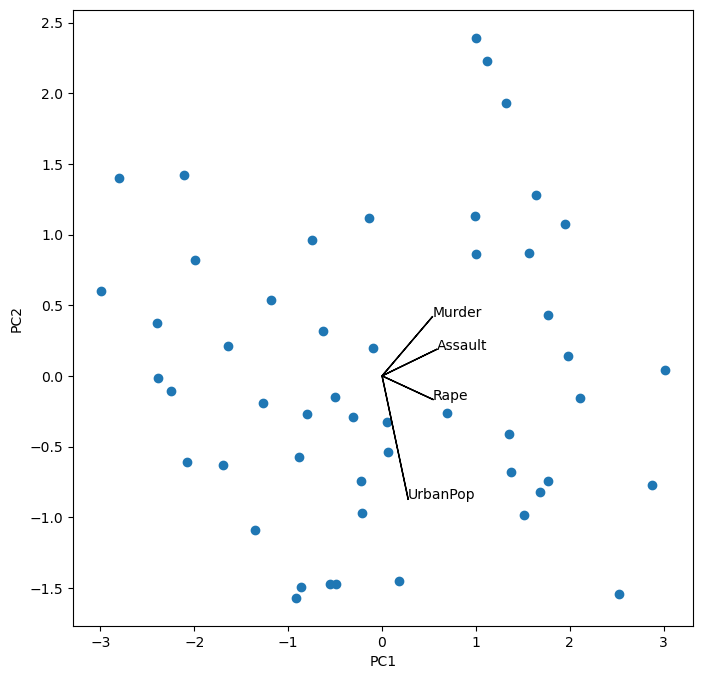

In [22]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k]) 
    ax.text(pcaUS.components_[i,k], pcaUS.components_[j,k], USArrests.columns[k])

#### Notice that this figure is a reflection of Figure 12.1 through the y-axis. Recall that the principal components are only unique up to a sign change, so we can reproduce that figure by flipping the signs of the second set of scores and loadings. We also increase the length of the arrows to emphasize the loadings.

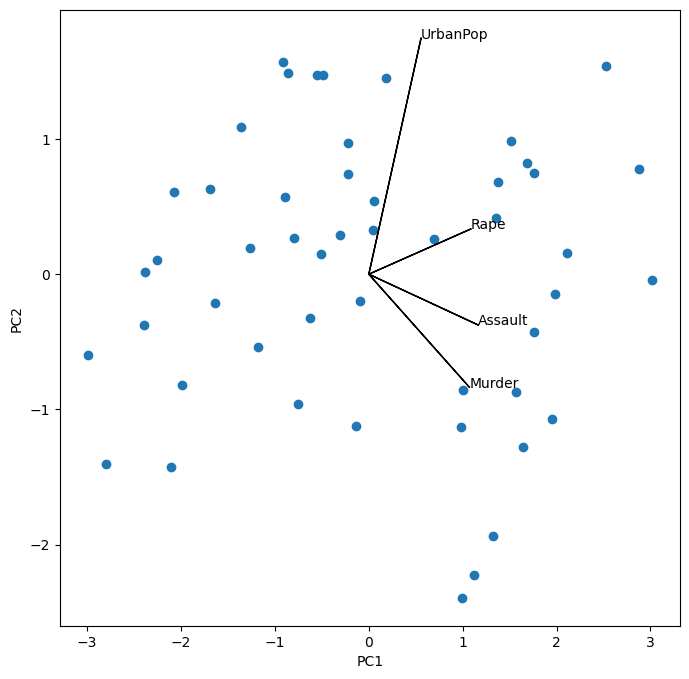

In [29]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis 
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[ j,k])
    ax.text(s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k], USArrests.columns[k])

In [30]:
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [31]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [32]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [34]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks, pcaUS.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Principal Component'); 
ax.set_ylabel('Proportion of Variance Explained') 
ax.set_ylim([0,1])
ax.set_xticks(ticks)

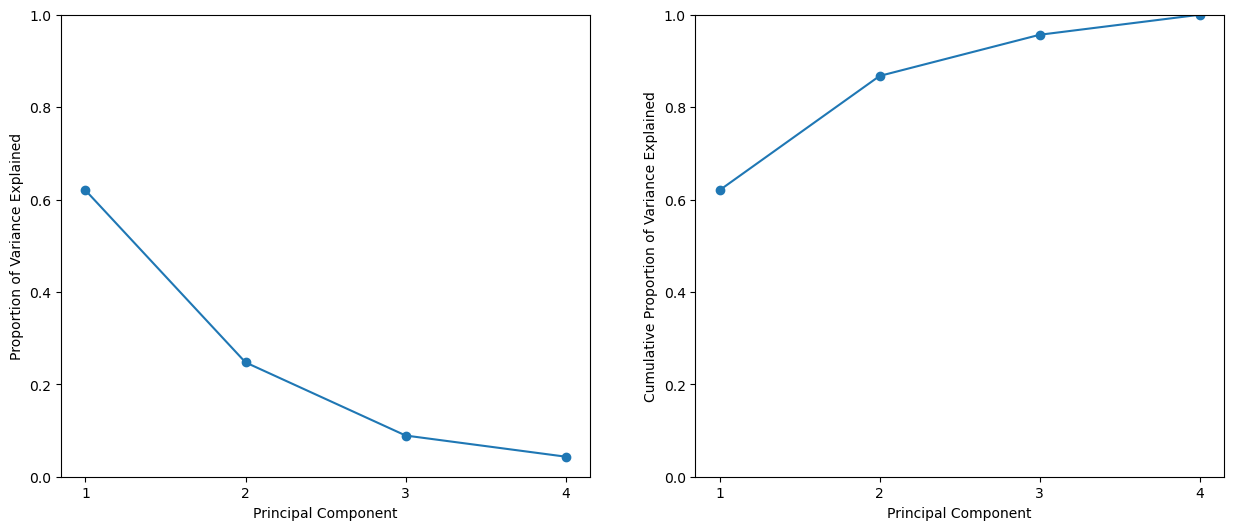

In [36]:
ax = axes[1] 
ax.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component') 
ax.set_ylabel('Cumulative Proportion of Variance Explained') 
ax.set_ylim([0, 1])
ax.set_xticks(ticks) 
fig

In [37]:
a = np.array([1,2,8,-3]) 
np.cumsum(a)

array([ 1,  3, 11,  8])

In [38]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False) 
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [39]:
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [40]:
pcaUS.components_


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [41]:
(U * D[None,:])[:3]

array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [42]:
scores[:3]

array([[ 0.98556588, -1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082, -0.83465292]])

In [43]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

In [46]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X) 
    L = U[:,:M] * D[None,:M] 
    return L.dot(V[:M])

In [48]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0) 
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [50]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2) 
mss0 = np.mean(Xna[~ismiss]**2)

In [52]:
while rel_err > thresh: 
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


In [53]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.7113567434297362

In [54]:
np.random.seed(0);
X = np.random.standard_normal((50,2)); 
X[:25,0] += 3;
X[:25,1] -= 4;

In [56]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)

In [57]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

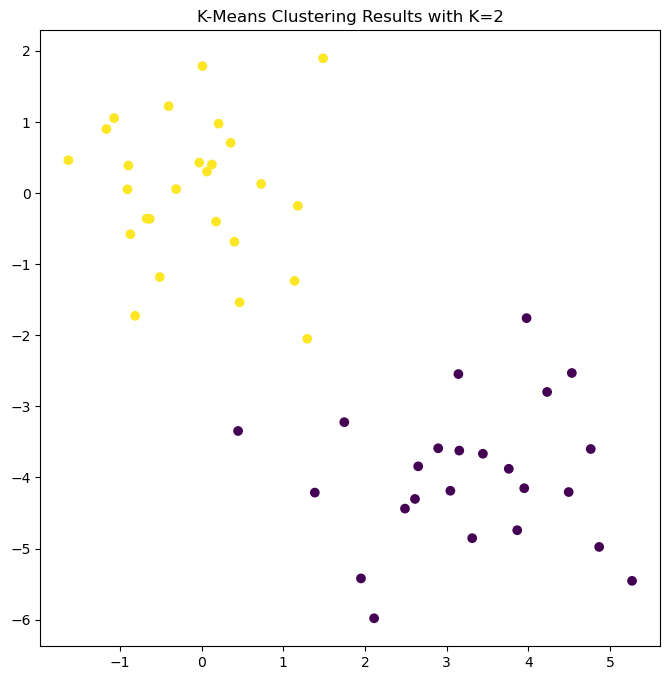

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(8,8)) 
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_) 
ax.set_title("K-Means Clustering Results with K=2");

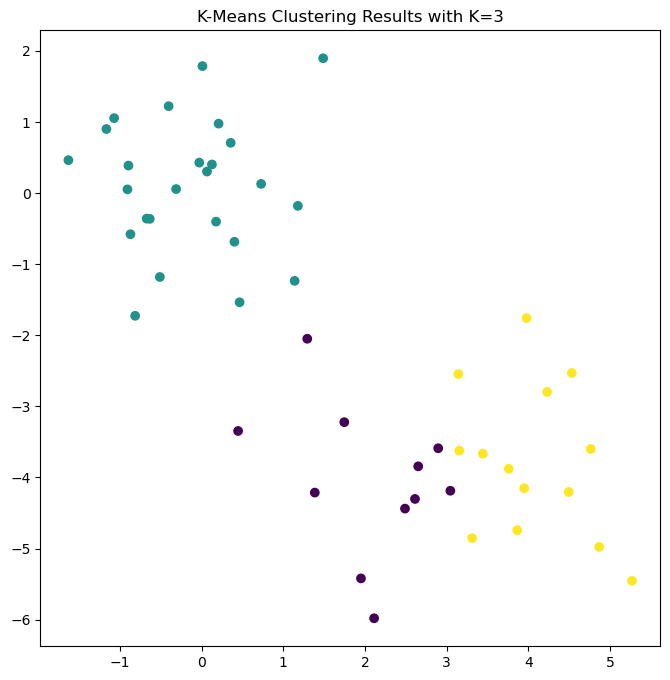

In [59]:
kmeans = KMeans(n_clusters=3, 
                random_state=3,
                n_init=20).fit(X) 
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_) 
ax.set_title("K-Means Clustering Results with K=3");

In [60]:
kmeans1 = KMeans(n_clusters=3,
                 random_state=3,
                 n_init=1).fit(X) 
kmeans20 = KMeans(n_clusters=3,
                  random_state=3,
                  n_init=20).fit(X); 
kmeans1.inertia_, kmeans20.inertia_

(76.85131986999252, 75.06261242745384)

In [61]:
NCI60 = load_data('NCI60') 
nci_labs = NCI60['labels'] 
nci_data = NCI60['data']

In [62]:
nci_data.shape

(64, 6830)

In [63]:
nci_labs.value_counts()

label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
dtype: int64

In [65]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data) 
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)

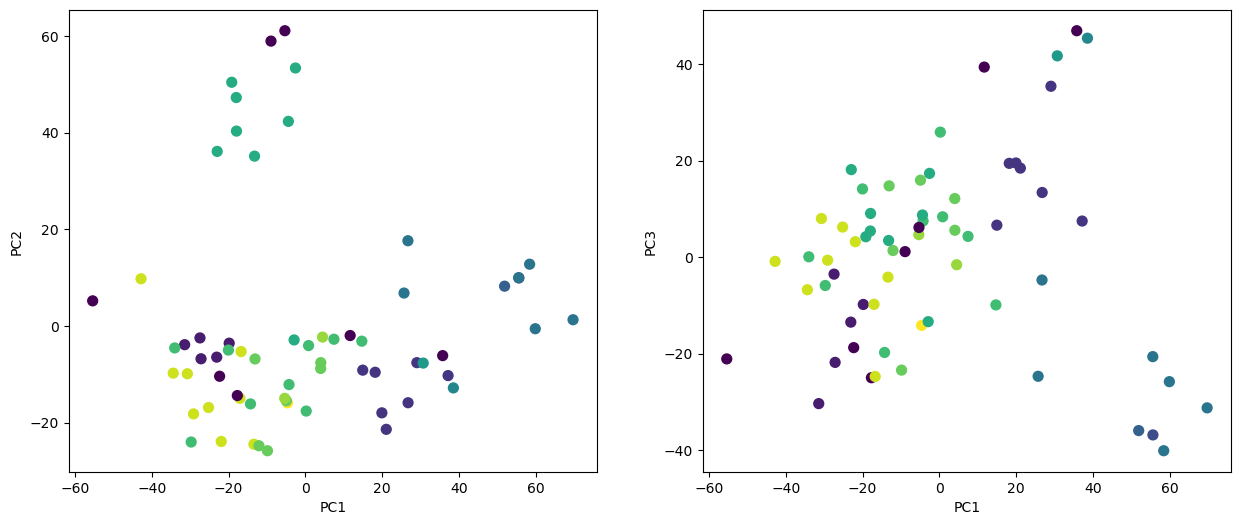

In [66]:
cancer_types = list(np.unique(nci_labs)) 
nci_groups = np.array([cancer_types.index(lab)
                       for lab in nci_labs.values]) 
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0] 
ax.scatter(nci_scores[:,0],
           nci_scores[:,1], 
           c=nci_groups, 
           marker='o', 
           s=50)
ax.set_xlabel('PC1'); 
ax.set_ylabel('PC2')
ax = axes[1] 
ax.scatter(nci_scores[:,0],
           nci_scores[:,2], 
           c=nci_groups, 
           marker='o', 
           s=50)
ax.set_xlabel('PC1'); 
ax.set_ylabel('PC3');

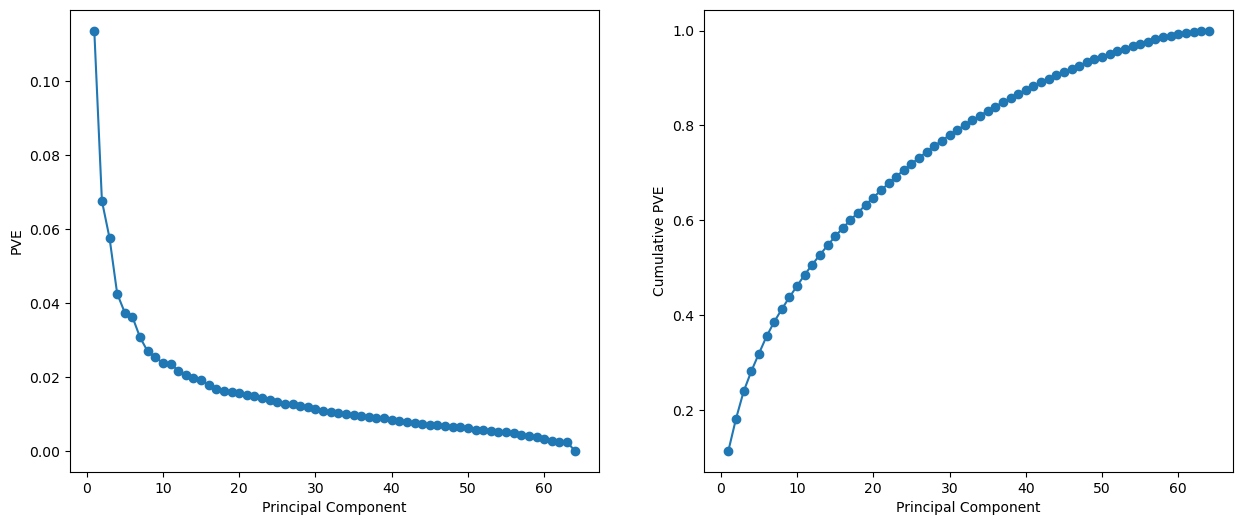

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) 
ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks, 
        nci_pca.explained_variance_ratio_ , 
        marker='o')
ax.set_xlabel('Principal Component'); 
ax.set_ylabel('PVE')
ax = axes[1]
ax.plot(ticks,
        nci_pca.explained_variance_ratio_.cumsum(),
        marker='o'); 
ax.set_xlabel('Principal Component') 
ax.set_ylabel('Cumulative PVE');